In [570]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, linear_model
from sklearn.neural_network import MLPClassifier

In [571]:
#load_path = 'D:\EECE499\Features\\'
load_path = '..\..\\'

In [572]:
Features = pd.read_excel(load_path + 'Features.xlsx')

In [573]:
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)] 
    return z

# Arousal

In [574]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -5].values

In [575]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [576]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [577]:
classifier = MLPClassifier(hidden_layer_sizes=(100,), random_state=0, verbose=1)
classifier.fit(X_train, y_train)

Iteration 1, loss = 2.24227480
Iteration 2, loss = 1.92201291
Iteration 3, loss = 1.73584694
Iteration 4, loss = 1.62823864
Iteration 5, loss = 1.57431180
Iteration 6, loss = 1.53352869
Iteration 7, loss = 1.49954390
Iteration 8, loss = 1.47121861
Iteration 9, loss = 1.44985790
Iteration 10, loss = 1.42905182
Iteration 11, loss = 1.41128883
Iteration 12, loss = 1.39165375
Iteration 13, loss = 1.37598673
Iteration 14, loss = 1.36197979
Iteration 15, loss = 1.34898648
Iteration 16, loss = 1.33629924
Iteration 17, loss = 1.32274333
Iteration 18, loss = 1.30977567
Iteration 19, loss = 1.30055342
Iteration 20, loss = 1.28994063
Iteration 21, loss = 1.27688629
Iteration 22, loss = 1.26787050
Iteration 23, loss = 1.25623072
Iteration 24, loss = 1.24540550
Iteration 25, loss = 1.23562045
Iteration 26, loss = 1.22898113
Iteration 27, loss = 1.21942947
Iteration 28, loss = 1.21145350
Iteration 29, loss = 1.20428849
Iteration 30, loss = 1.19443654
Iteration 31, loss = 1.18836438
Iteration 32, los

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False)

In [578]:
y_pred_train = classifier.predict(X_train)

In [579]:
confusion_mtrx = confusion_matrix(y_train, y_pred_train)

In [580]:
confusion_mtrx

array([[  6,   0,   0,   0,   0,   0,   0],
       [  0,  32,   1,   0,   3,   1,   0],
       [  0,   1,  60,   1,   3,   2,   0],
       [  1,   0,   1,  98,   5,   3,   0],
       [  0,   0,   0,   1, 208,   2,   0],
       [  0,   0,   1,   1,   9, 146,   0],
       [  0,   0,   1,   0,   5,   2,  44]], dtype=int64)

In [581]:
accuracy = accuracy_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train)

In [582]:
print(accuracy, mae, rmse)

0.9310344827586207 0.11912225705329153 0.2601880877742947


In [583]:
y_pred = classifier.predict(X_test)

In [584]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [585]:
confusion_mtrx

array([[ 0,  0,  0,  0,  1,  1,  0],
       [ 0,  1,  3,  0,  6,  1,  0],
       [ 0,  0,  2,  3, 11,  3,  1],
       [ 1,  1,  1, 11, 16, 10,  6],
       [ 0,  3,  5, 14, 31, 20,  1],
       [ 0,  2,  4,  7, 16, 12,  3],
       [ 0,  0,  2,  3,  6,  5,  0]], dtype=int64)

In [586]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [587]:
print(accuracy, mae, rmse)

0.2676056338028169 1.2863849765258215 2.892018779342723


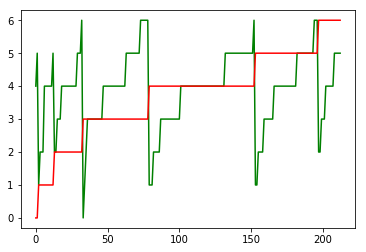

In [588]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

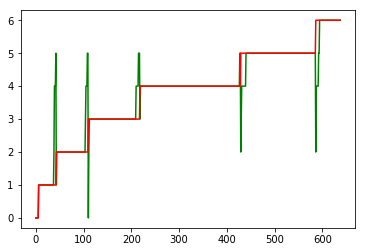

In [589]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [590]:
param_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [591]:
classifier = MLPClassifier(random_state=42)

grid_search = GridSearchCV(classifier, param_grid=param_space, cv=StratifiedKFold(2), scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20

C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)], 'activation': ['relu'], 'solver': ['adam', 'sgd'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [592]:
y_pred_train = grid_search.predict(X_train)

In [593]:
confusion_mtrx = confusion_matrix(y_train, y_pred_train)

In [594]:
confusion_mtrx

array([[  0,   0,   2,   0,   4,   0,   0],
       [  0,   0,   1,   2,  19,  15,   0],
       [  0,   0,   9,   5,  32,  19,   2],
       [  0,   0,   4,  46,  44,  12,   2],
       [  0,   0,   3,  13, 158,  37,   0],
       [  0,   0,   0,   6,  57,  94,   0],
       [  0,   0,   0,   4,  24,  20,   4]], dtype=int64)

In [595]:
accuracy = accuracy_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train)

In [596]:
print(accuracy, mae, rmse)

0.48746081504702193 0.8761755485893417 1.938871473354232


In [597]:
y_pred = grid_search.predict(X_test)

In [598]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [599]:
confusion_mtrx

array([[ 0,  0,  0,  1,  1,  0,  0],
       [ 0,  0,  3,  0,  5,  3,  0],
       [ 0,  0,  2,  2, 12,  3,  1],
       [ 0,  0,  1,  8, 23, 13,  1],
       [ 0,  0,  2,  7, 45, 20,  0],
       [ 0,  0,  4,  6, 17, 17,  0],
       [ 0,  0,  1,  4,  5,  6,  0]], dtype=int64)

In [600]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [601]:
print(accuracy, mae, rmse)

0.3380281690140845 1.0938967136150235 2.295774647887324


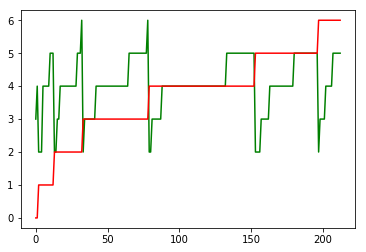

In [602]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

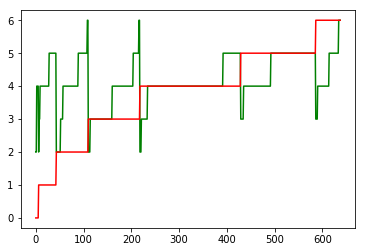

In [603]:
y_pred = grid_search.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [604]:
grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'constant',
 'solver': 'sgd'}